## Random Forest

sklearn random forest classifier documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

sklearn random forest regressor documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Import the data

In [2]:
data = pd.read_csv("./Churn_Modelling.csv")

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Feature and target

X = data.drop('Exited', axis=1)
y = data['Exited'].values.flatten()

# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

X_train.shape, X_test.shape

((7500, 10), (2500, 10))

### Encoding the variables

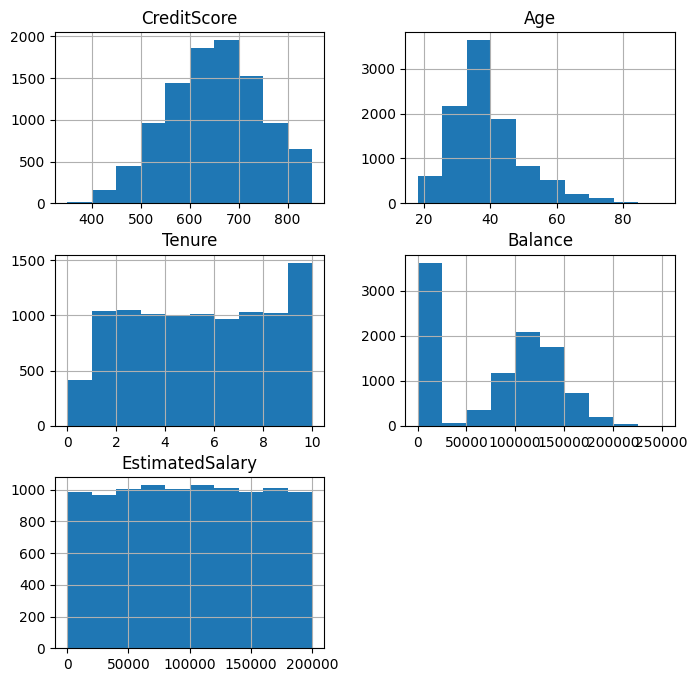

In [5]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_cols_non_enc = ['Geography', 'Gender']
categorical_cols_enc = ['NumOfProducts','HasCrCard', 'IsActiveMember']

X[numerical_cols].hist(figsize=(8,8));

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [7]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ("standard_scaler", StandardScaler(), numerical_cols),
                        ("one_hot_encoder", OneHotEncoder(), categorical_cols_non_enc),
                        ("categorical_passthrough", "passthrough", categorical_cols_enc)
                    ]
                )

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [8]:
X_train.shape

(7500, 13)

### Fitting the random forest model

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# define the classifier
clf = RandomForestClassifier(n_estimators=200, min_samples_split=10)

# train the classifier
clf.fit(X_train, y_train)

clf

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluating on test data

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating the model on train dataset
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.8616


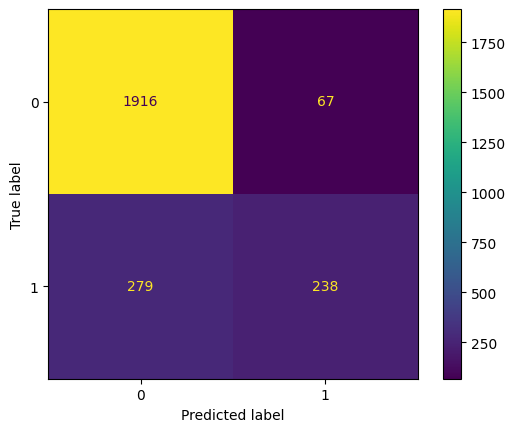

In [12]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot();

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1983
           1       0.78      0.46      0.58       517

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.85      0.86      0.85      2500



### OOB error

In [14]:
# fit the random forest classifier with oob

clf = RandomForestClassifier(n_estimators=200, min_samples_split=10, oob_score=True)

clf.fit(X_train, y_train)

clf

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [15]:
clf.oob_score_

0.862

In [17]:
oob_error = 1 - clf.oob_score_

oob_error

0.138